In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
df_FD = pd.read_pickle('cleaned_MASTER_dataset.pickle')  # fish details
df_LF = pd.read_pickle('cleaned_LENGTHFREQ_dataset.pickle')  # length frequencies
df_SD = pd.read_pickle('cleaned_LOGBOOK_dataset.pickle')  # logbook / sample data

# Histograms

--------------------------------------------------
Histogram: YY


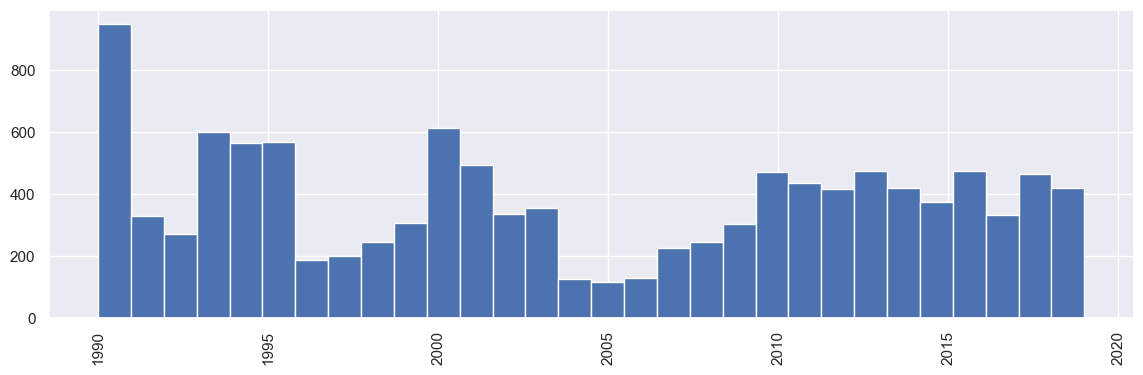

--------------------------------------------------
Histogram: MM


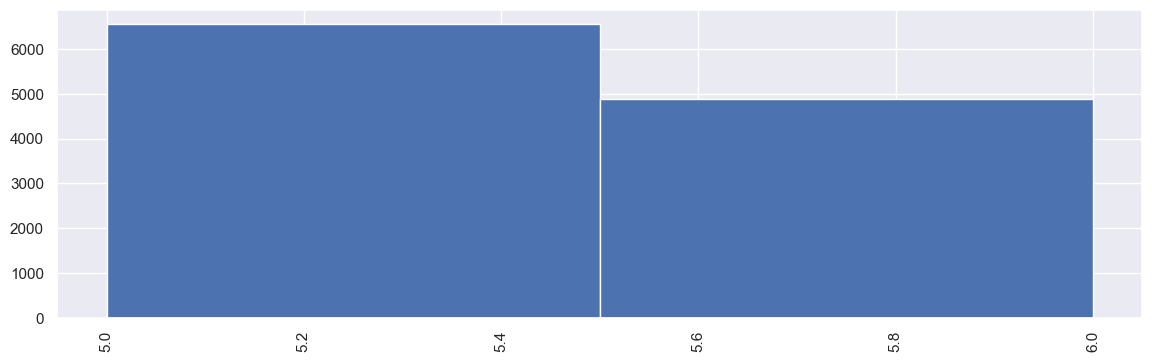

--------------------------------------------------
Histogram: DD


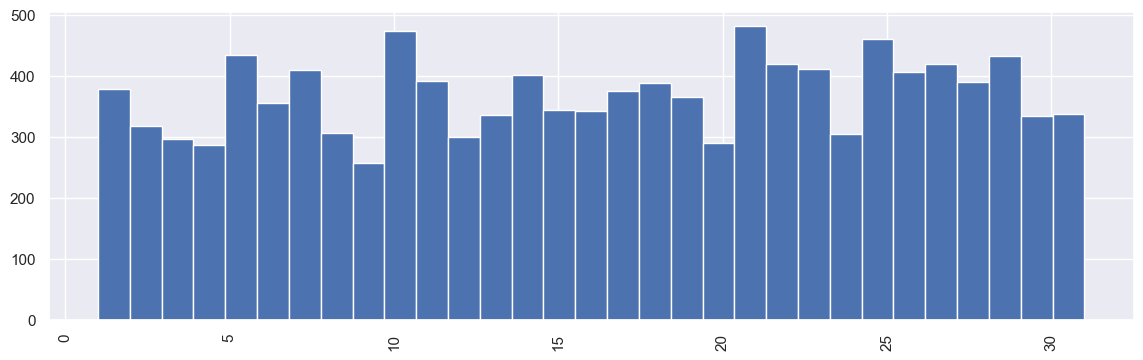

--------------------------------------------------
Histogram: TIME


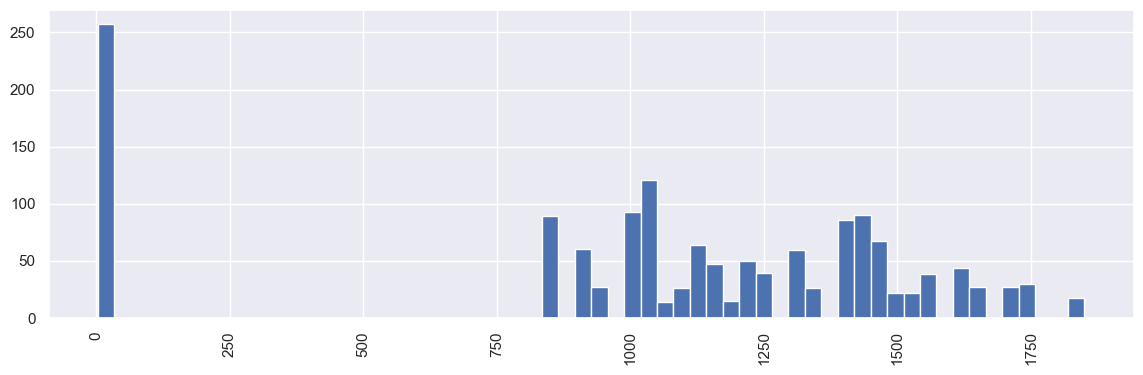

--------------------------------------------------
Histogram: RIVER


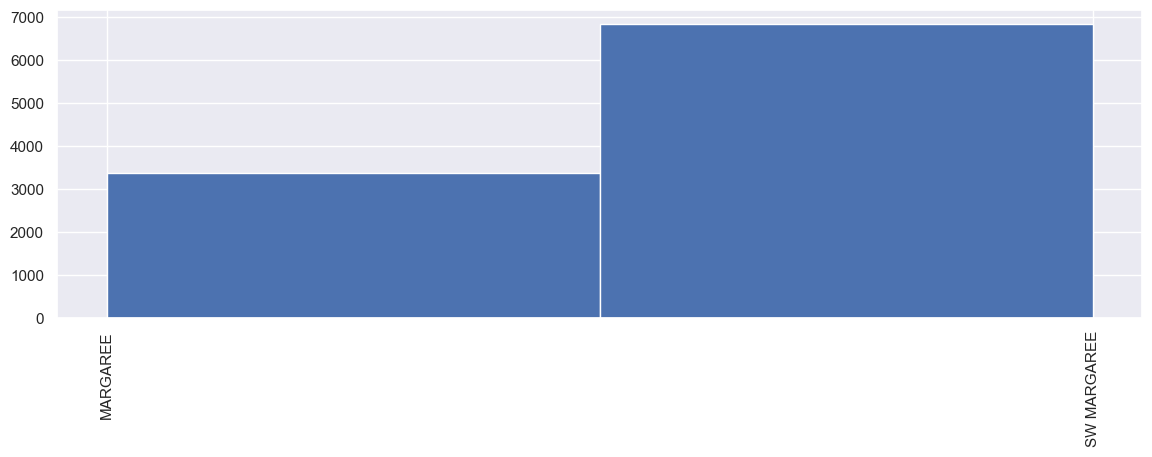

--------------------------------------------------
Histogram: WEEK


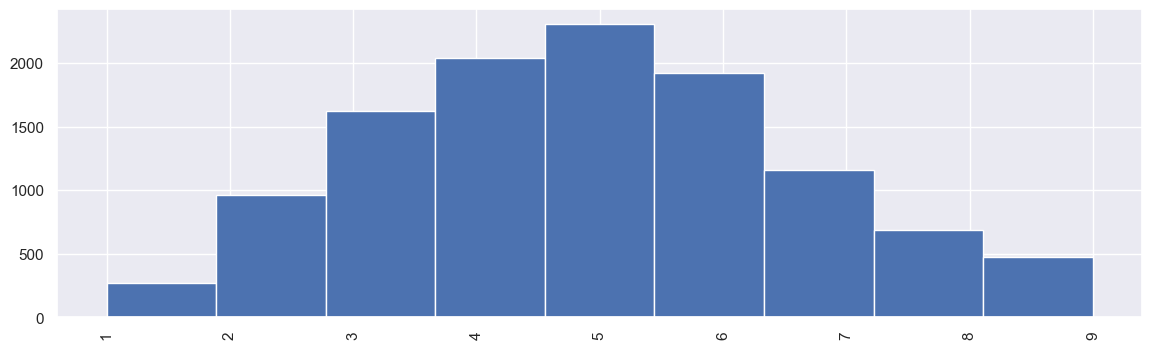

--------------------------------------------------
Histogram: LOC


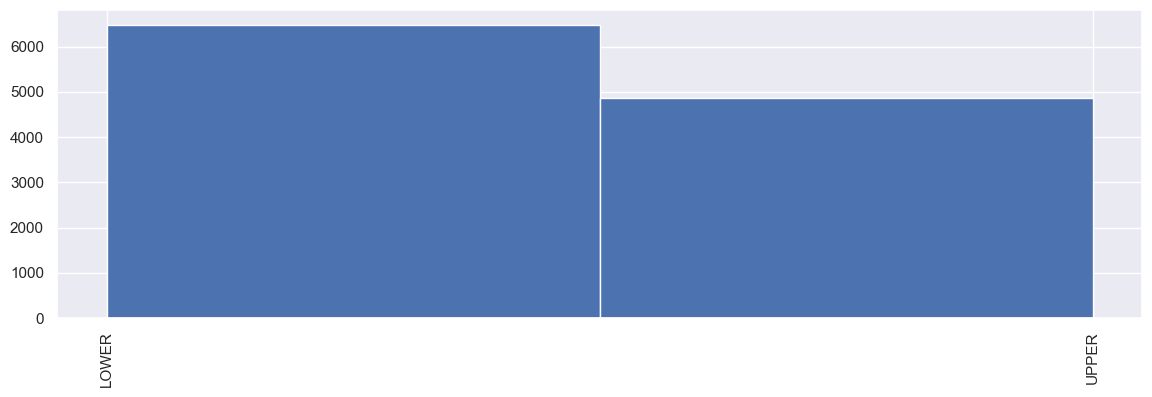

--------------------------------------------------
Histogram: PERIOD


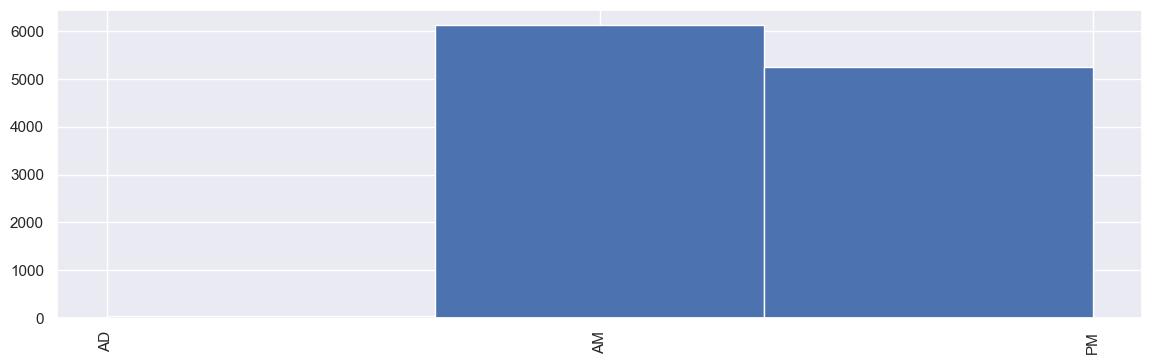

--------------------------------------------------
Histogram: WT_LBS


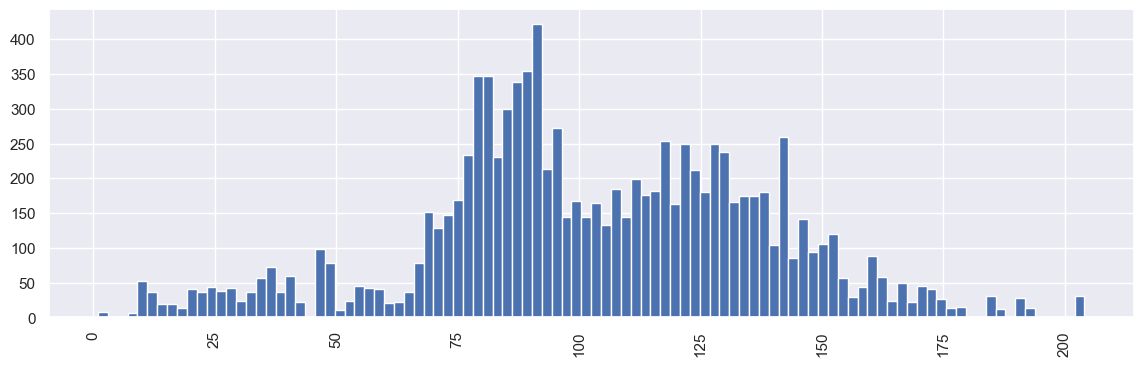

--------------------------------------------------
Histogram: WT_KG


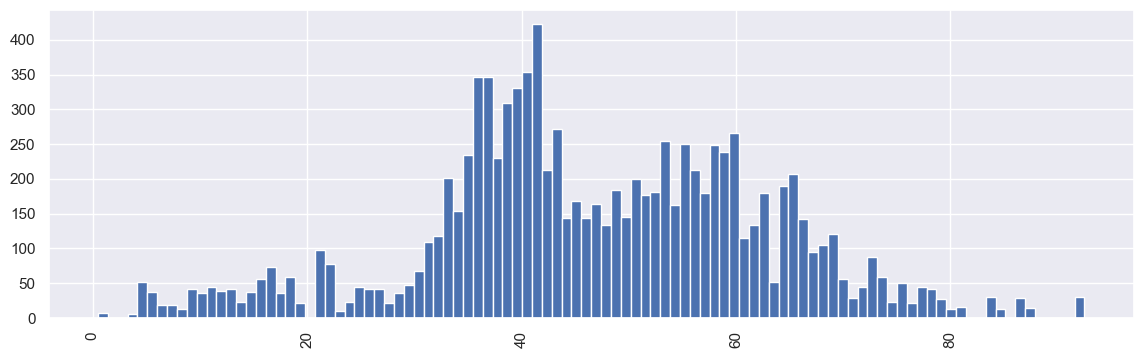

--------------------------------------------------
Histogram: LGTH


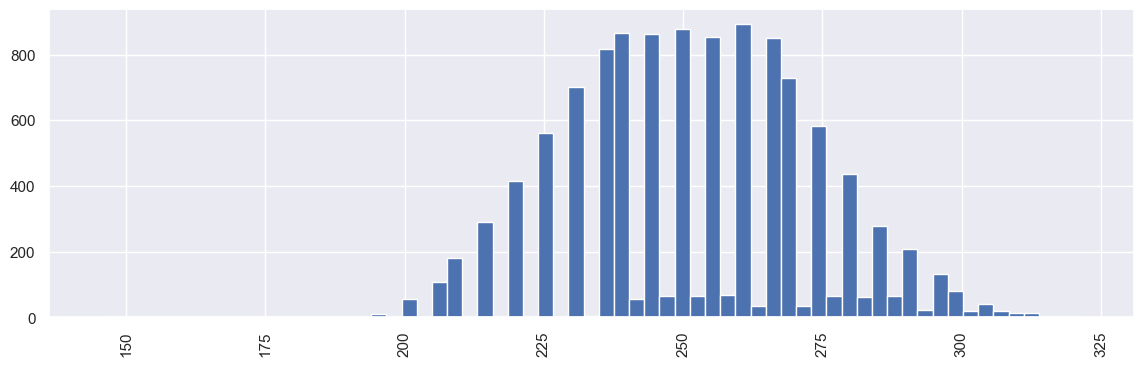

--------------------------------------------------
Histogram: FREQ


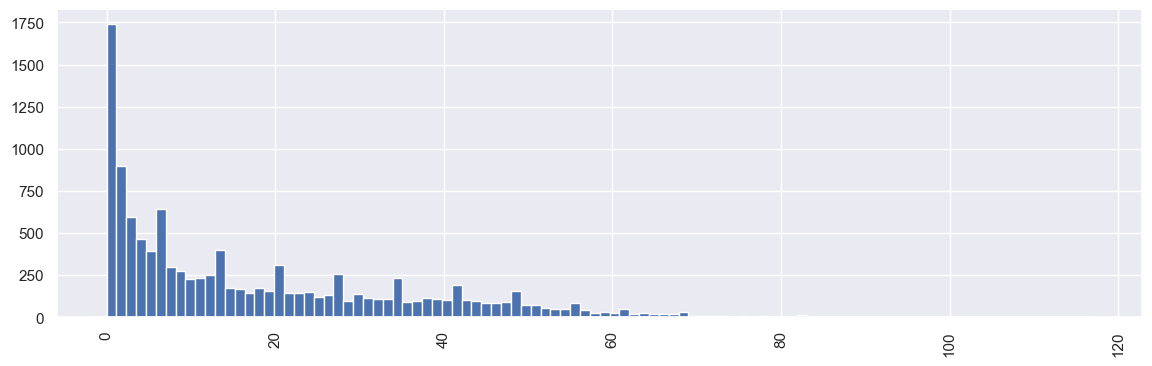

--------------------------------------------------
Histogram: FLBIN


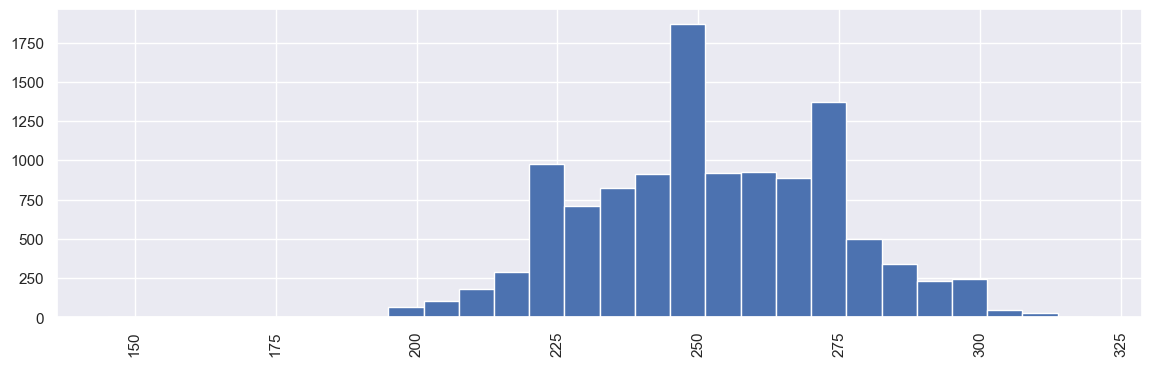

--------------------------------------------------
Histogram: SITE1


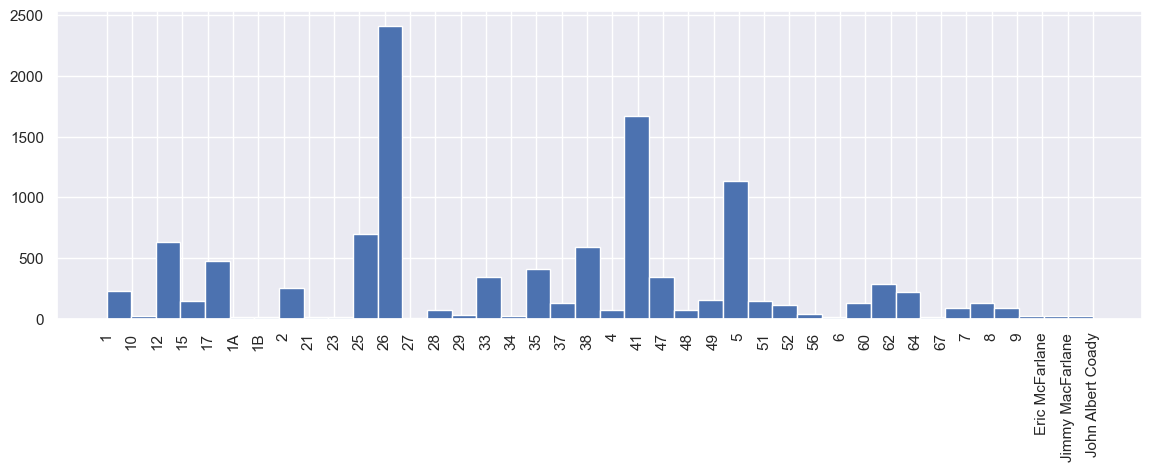

--------------------------------------------------
Histogram: SITE2


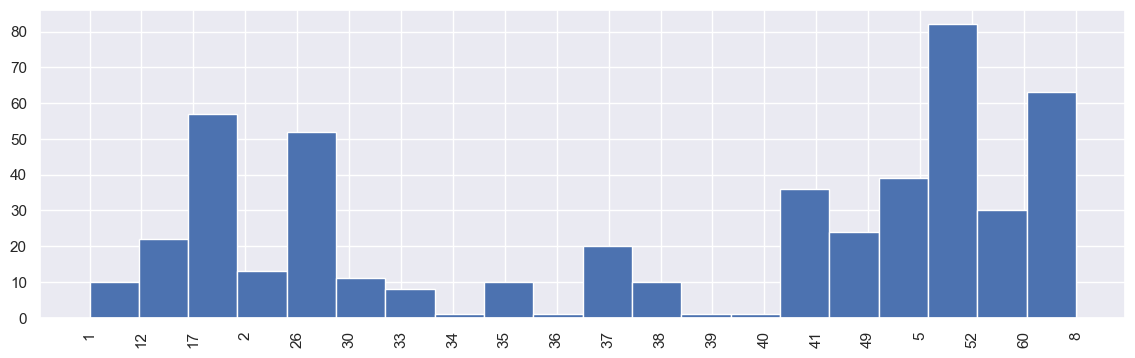

--------------------------------------------------
Histogram: SITE3


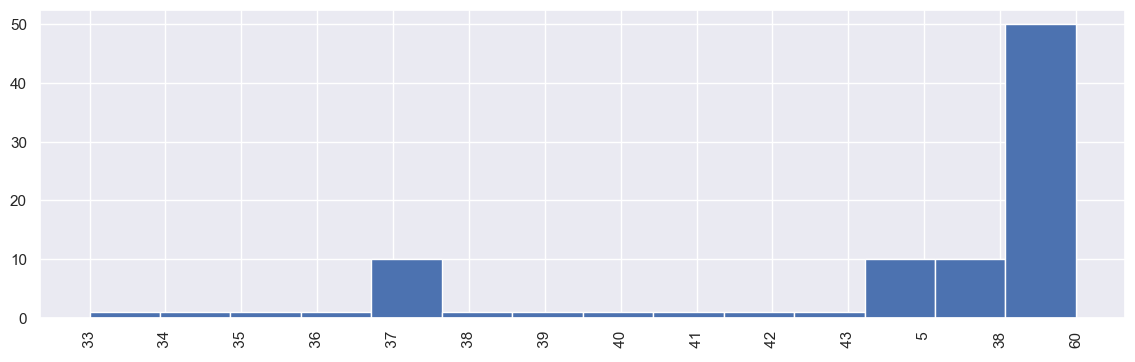

In [28]:
columns_to_print = ['yy', 'mm', 'dd', 'Time', 'river', 'week', 'loc', 'period',
       'wt_lbs', 'wt_kg', 'lgth', 'freq', 'Flbin', 'SITE1', 'SITE2', 'SITE3']

for column in columns_to_print:
    print('--------------------------------------------------\nHistogram:', column.upper())
    
    plt.figure(figsize=(14, 4))
    
    n_unique = df_LF[column].nunique()
    
    max_bins = 100
    if n_unique <= max_bins:
        bins = n_unique
    else:
        bins = max_bins

    # need to sort columns or categorical values are all over the place (still not perfect, but way better)
    df_LF.sort_values(column)[column].hist(bins=bins, color=sns.color_palette()[0], xrot=90)
    
    plt.show()

--------------------------------------------------
Histogram: SITE_NO


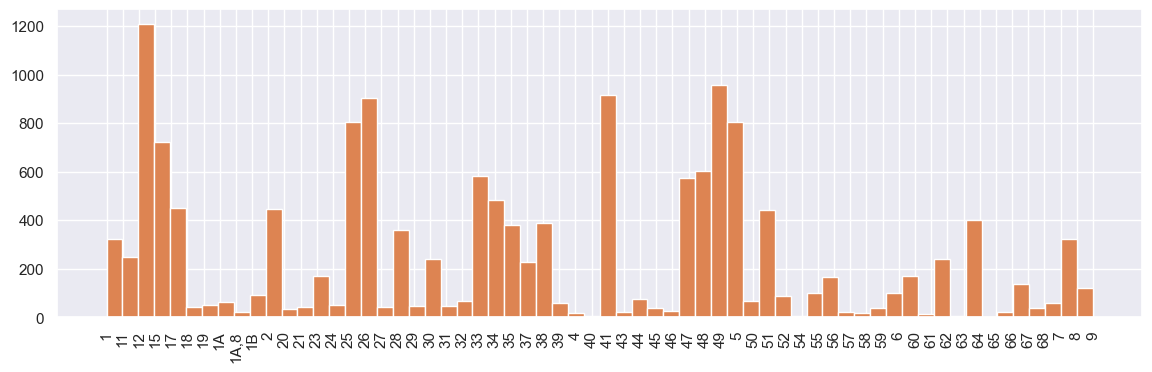

--------------------------------------------------
Histogram: NO_NETS


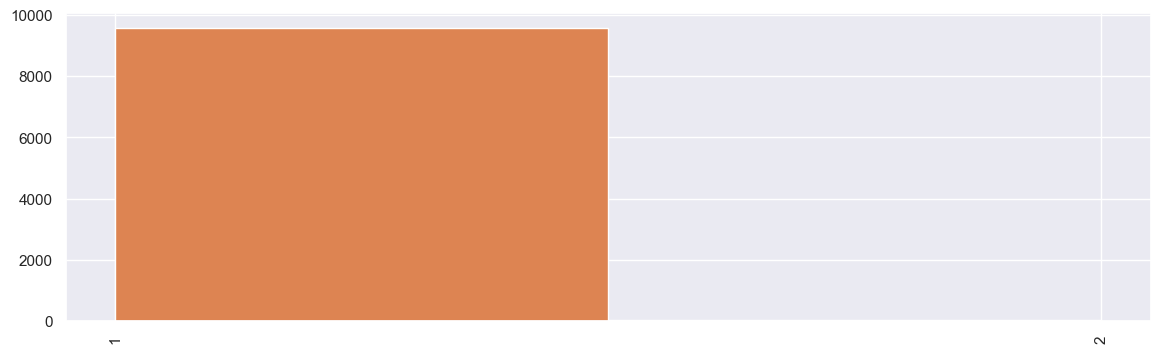

--------------------------------------------------
Histogram: YEAR


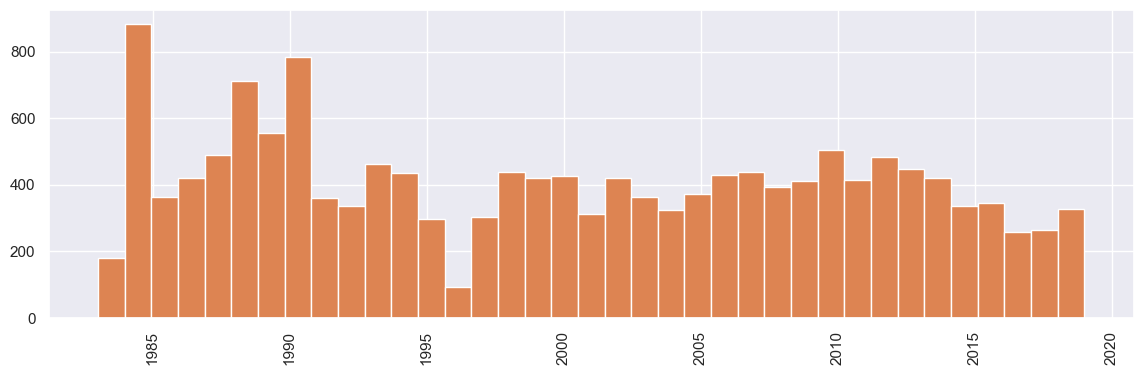

--------------------------------------------------
Histogram: MM


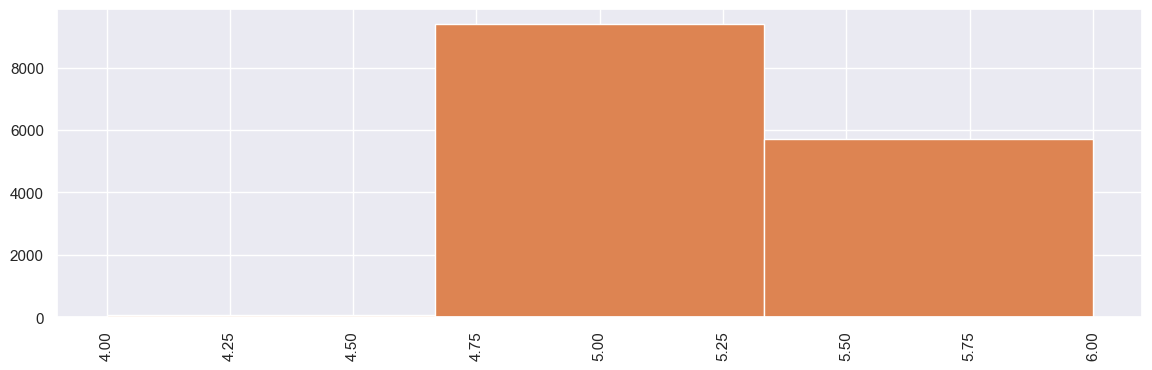

--------------------------------------------------
Histogram: DD


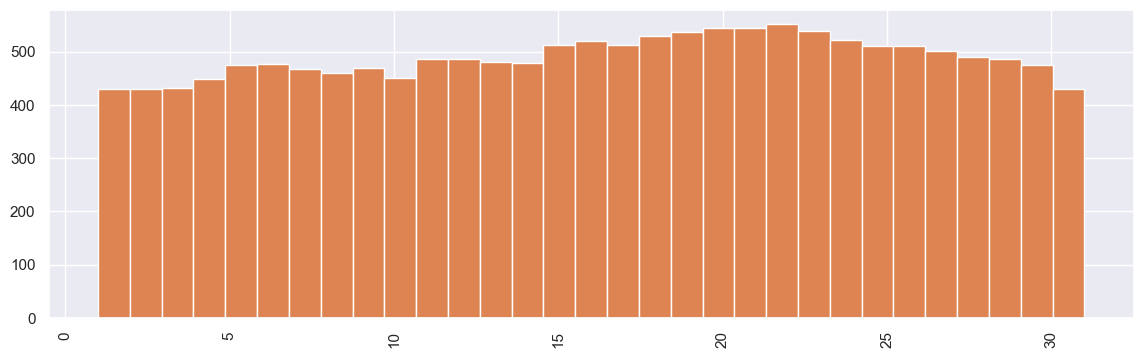

--------------------------------------------------
Histogram: WEEK


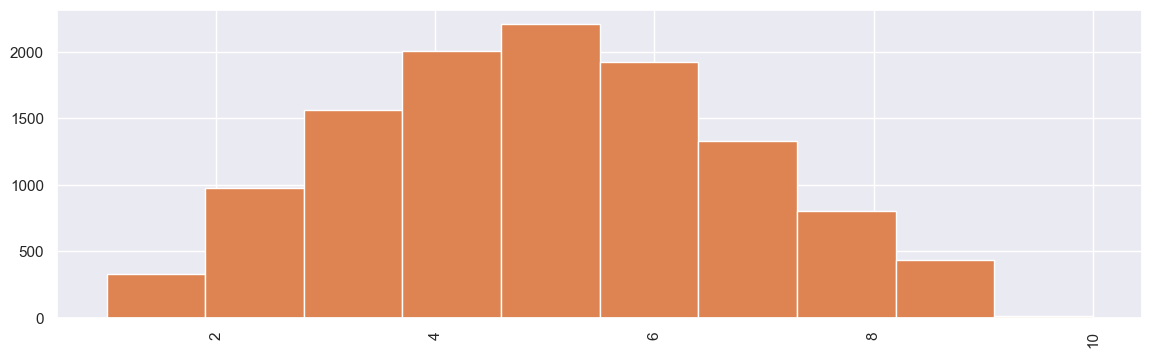

--------------------------------------------------
Histogram: CATCH_LBS


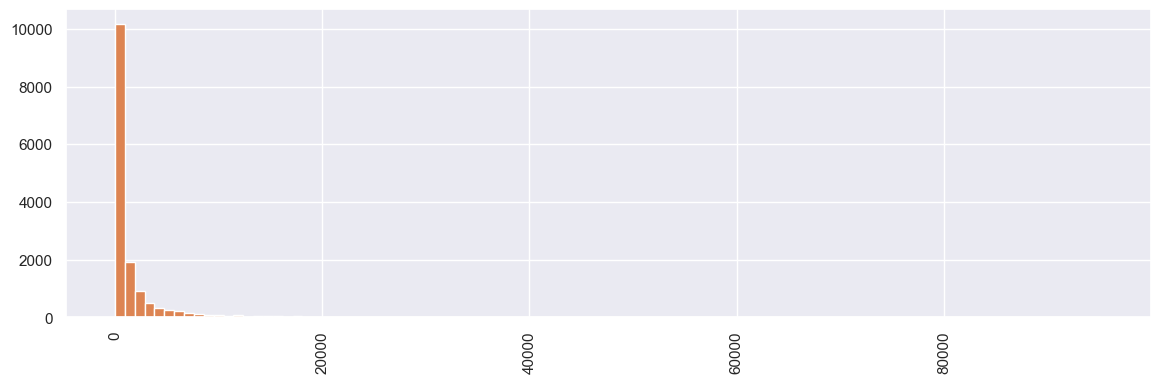

--------------------------------------------------
Histogram: CATCH_KG


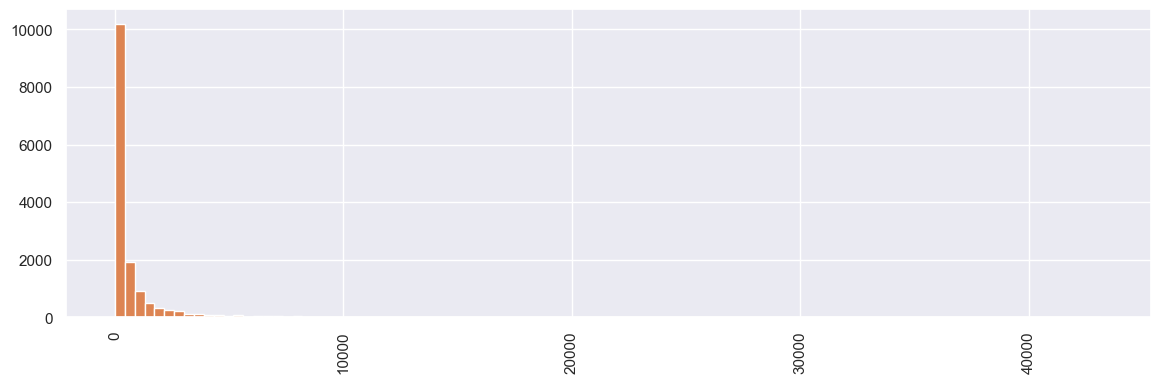

--------------------------------------------------
Histogram: HOURS_FISHED


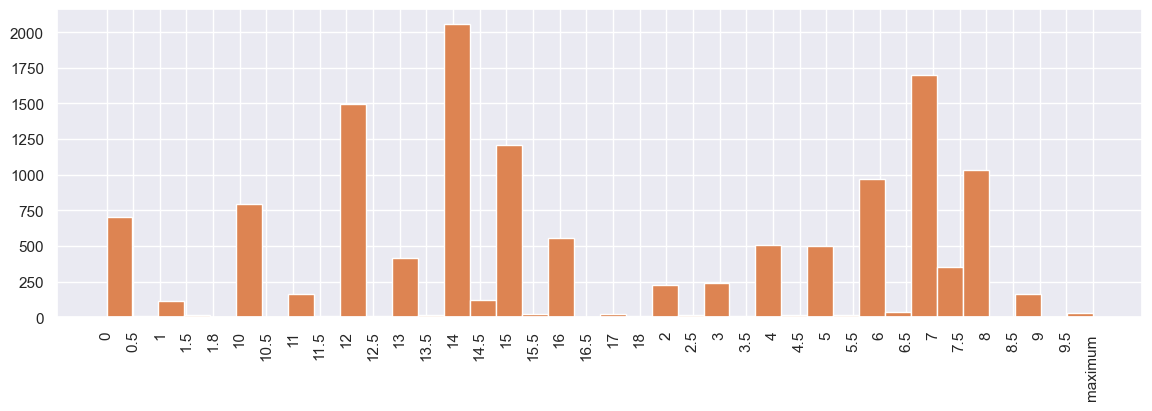

--------------------------------------------------
Histogram: ZONE


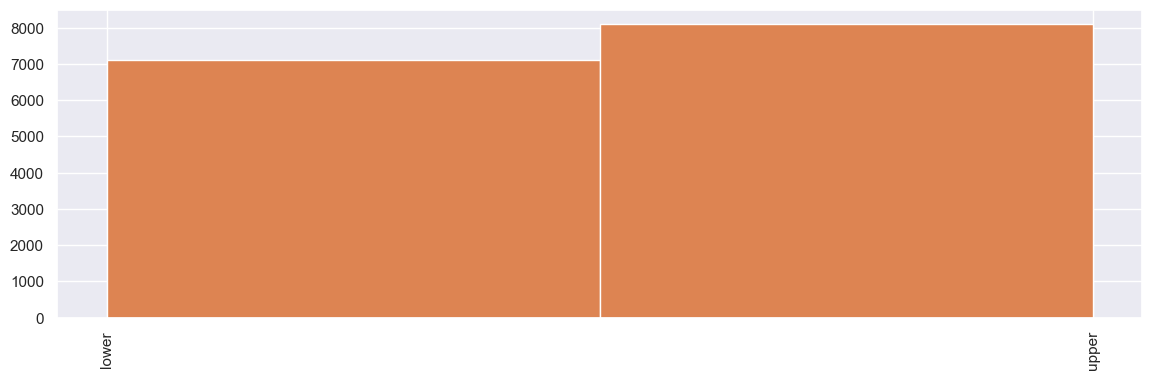

--------------------------------------------------
Histogram: LAST_NAME


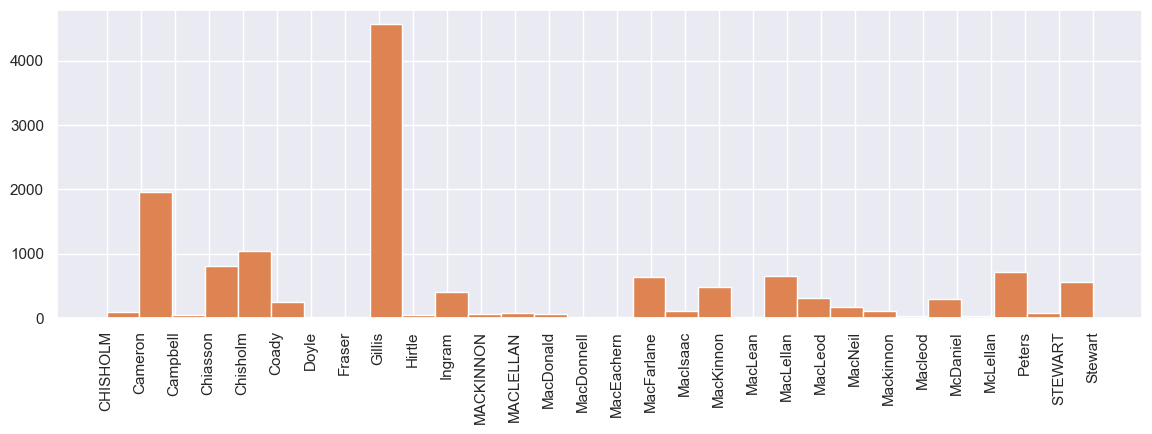

--------------------------------------------------
Histogram: SITE1


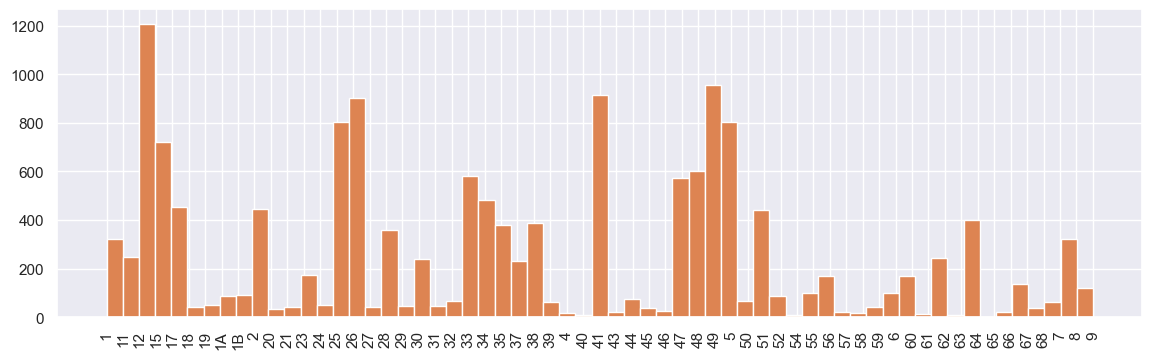

--------------------------------------------------
Histogram: SITE2


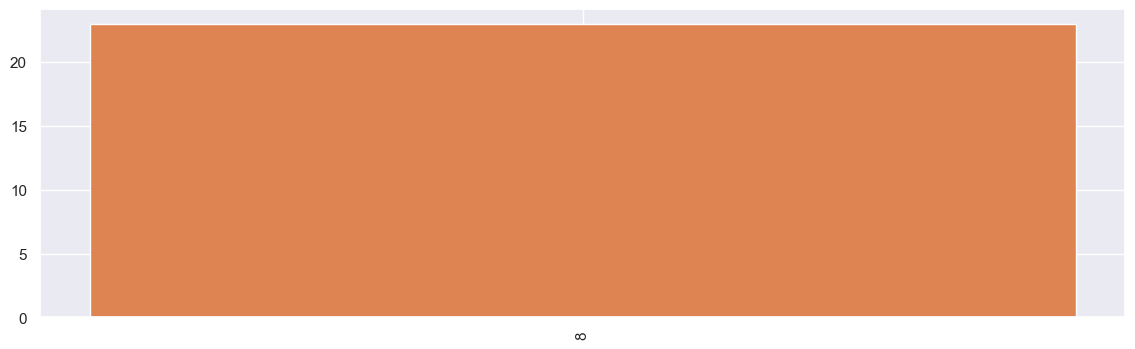

In [23]:
columns_with_no_data = ['DIST', 'RIVER', 'code', 'GEAR', ]
columns_to_print = [
    'SITE_NO', 'no_nets', 'YEAR', 'MM', 'DD', 'Week', 'catch_lbs', 'catch_kg', 
    'hours_fished', 'zone', 'last_name', 'SITE1', 'SITE2'
]

for column in columns_to_print:
    print('--------------------------------------------------\nHistogram:', column.upper())
    
    plt.figure(figsize=(14, 4))
    
    n_unique = df_SD[column].nunique()
    
    max_bins = 100
    if n_unique <= max_bins:
        bins = n_unique
    else:
        bins = max_bins
    
    # need to sort columns or categorical values are all over the place (still not perfect, but way better)
    df_SD.sort_values(column)[column].hist(bins=bins, color=sns.color_palette()[1], xrot=90)
    
    plt.show()

# Time Series


-------------------------------------------------------
RIVER
CATEGORICAL


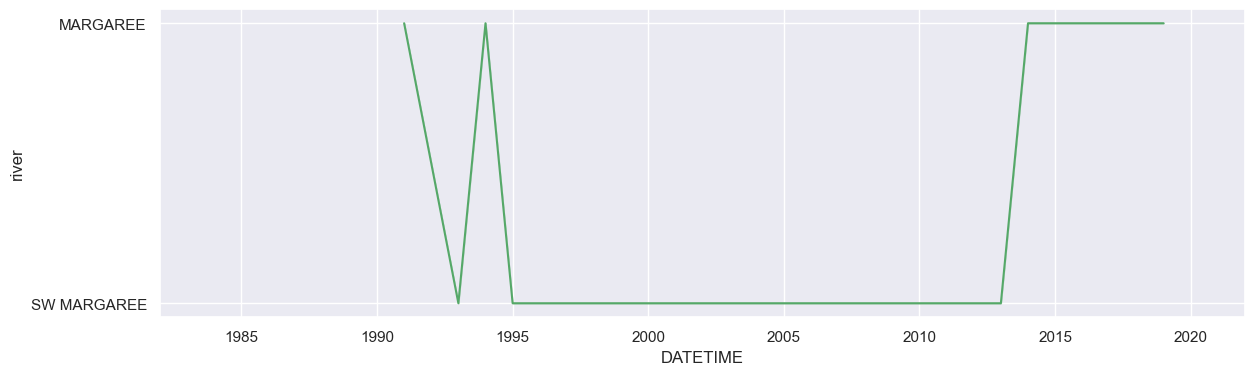


-------------------------------------------------------
SITE
CATEGORICAL


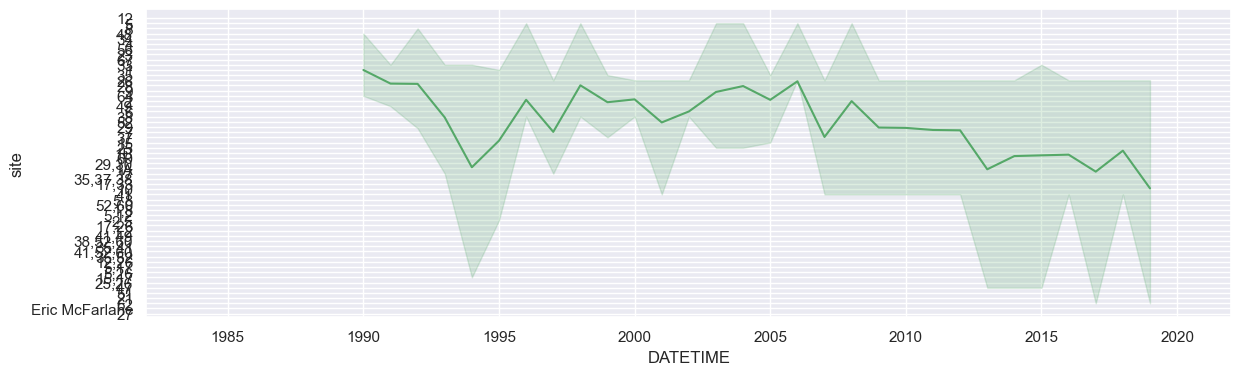


-------------------------------------------------------
LOC
CATEGORICAL


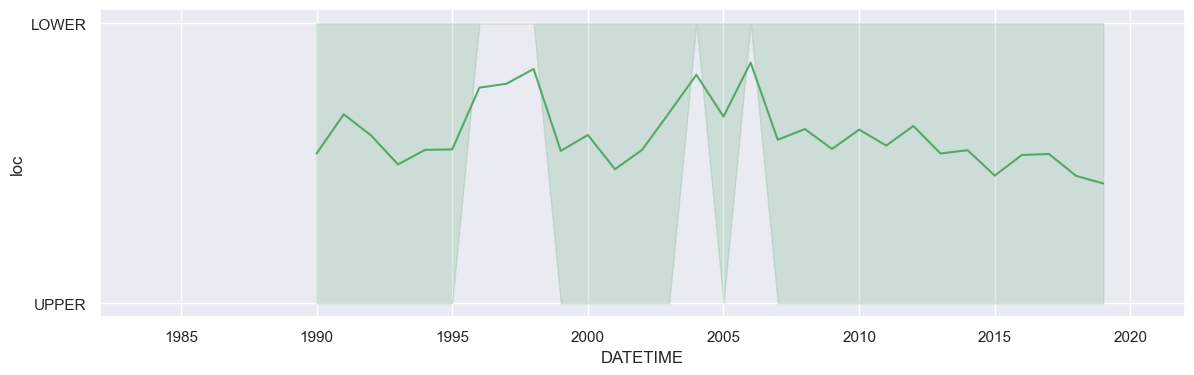


-------------------------------------------------------
PERIOD
CATEGORICAL


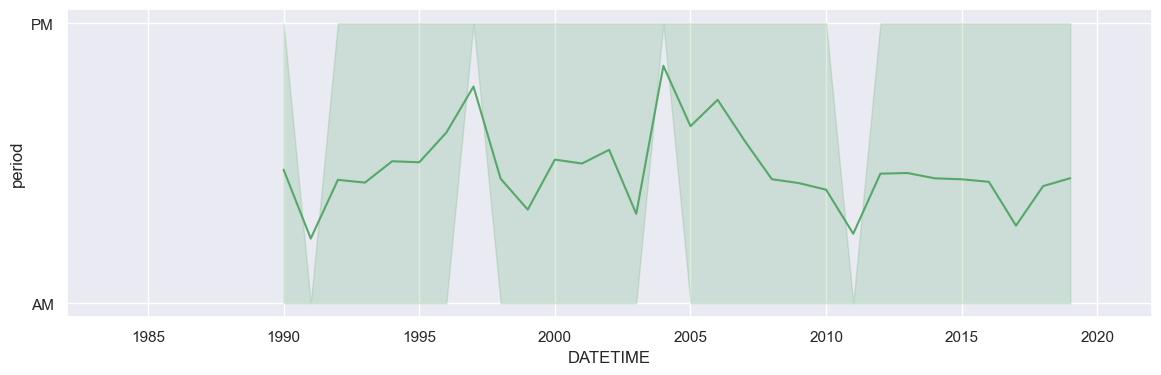


-------------------------------------------------------
WT_LBS
FLOAT


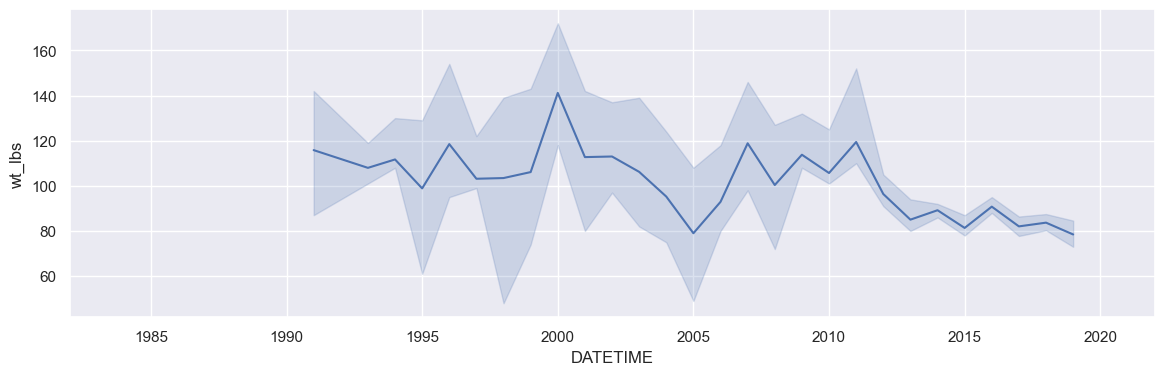


-------------------------------------------------------
WT_KG
FLOAT


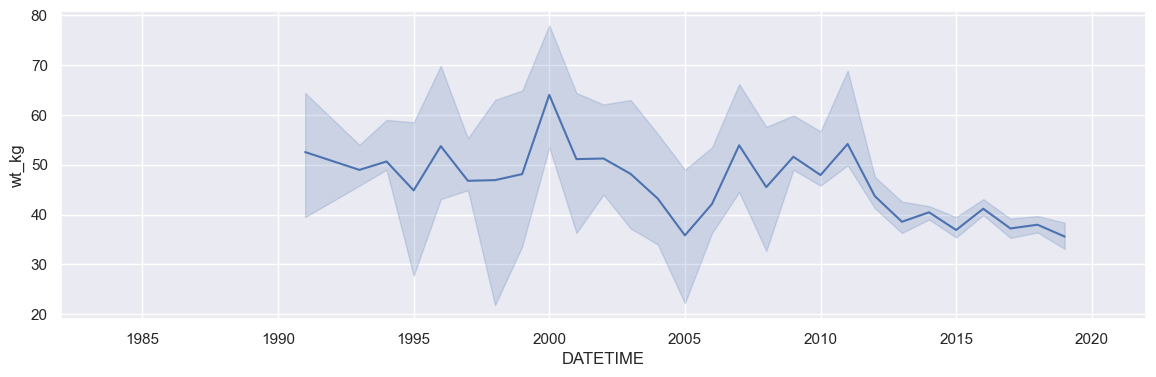


-------------------------------------------------------
LGTH
INT


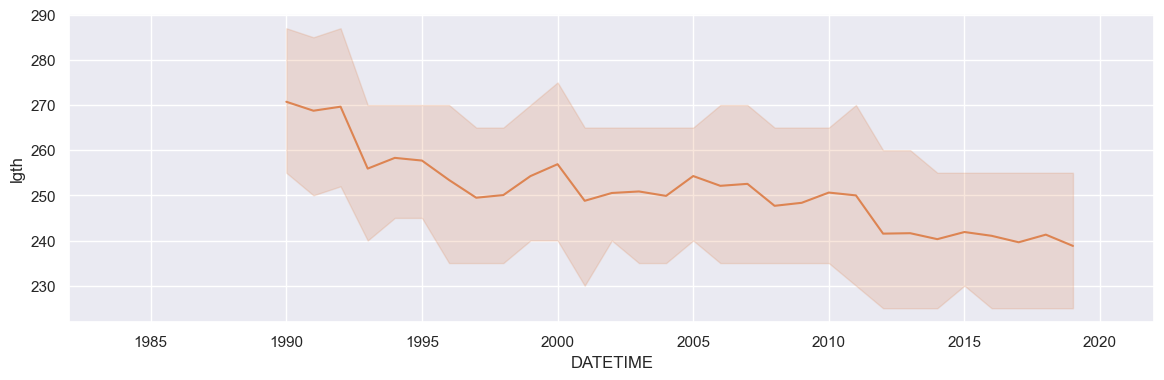


-------------------------------------------------------
FREQ
INT


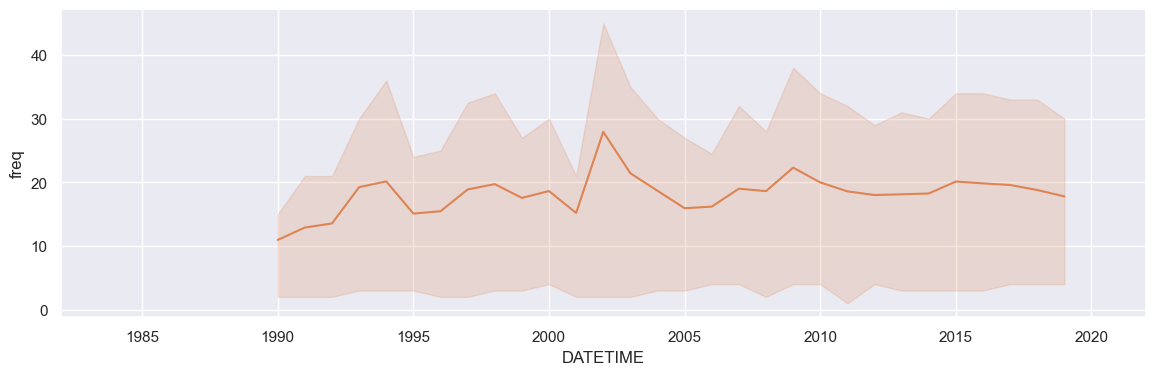


-------------------------------------------------------
FLBIN
INT


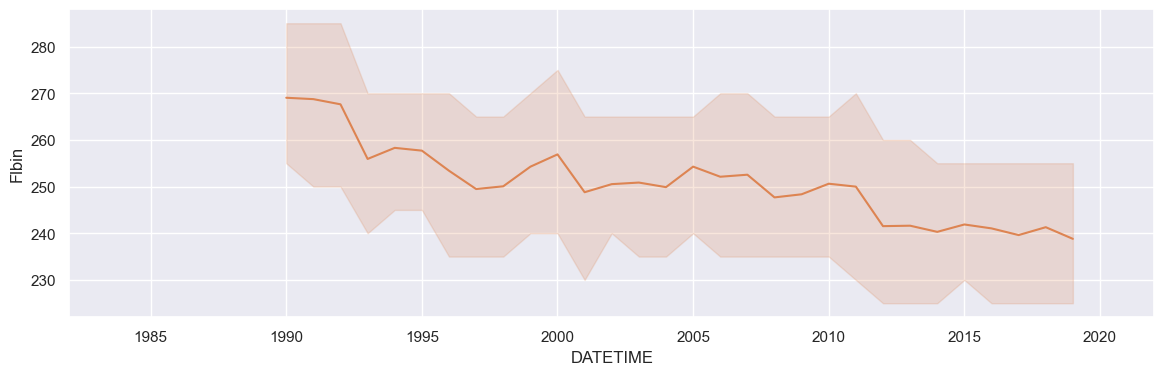


-------------------------------------------------------
SITE1
CATEGORICAL


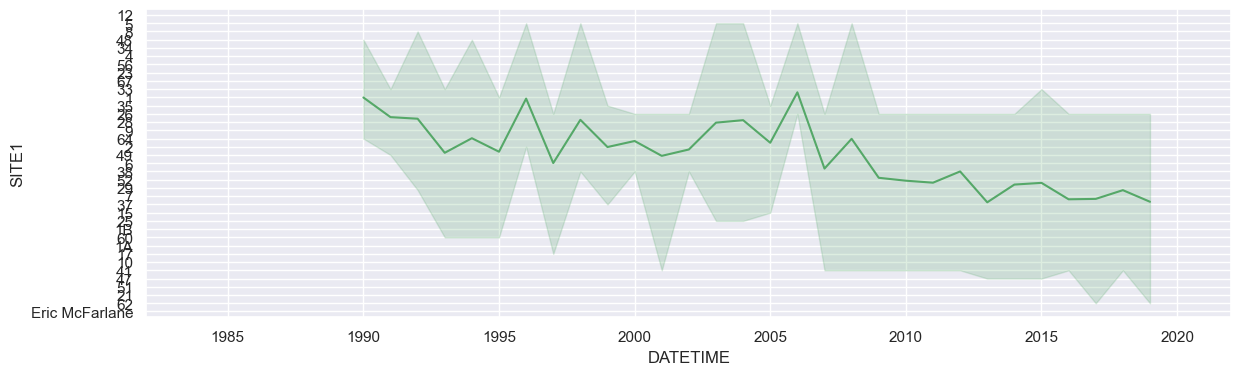


-------------------------------------------------------
SITE2
CATEGORICAL


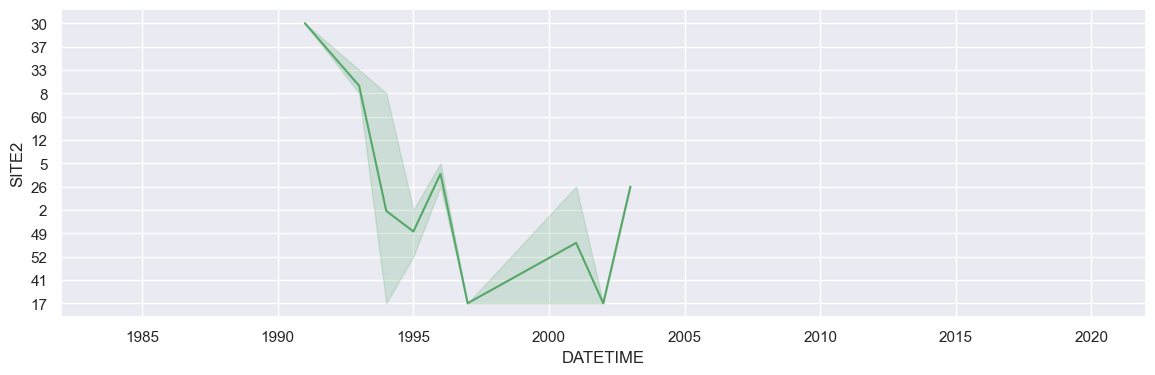


-------------------------------------------------------
SITE3
CATEGORICAL


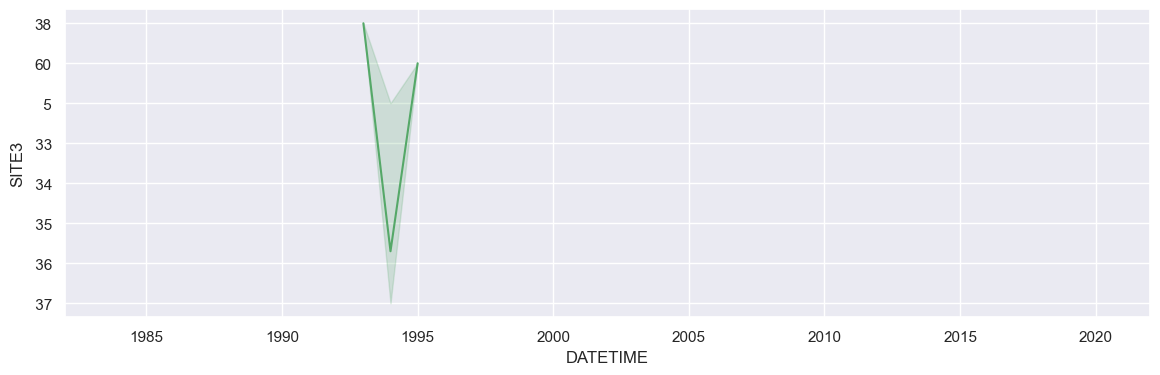

In [26]:
features = {
    'river': 'categorical',
    'site': 'categorical', 
    'loc': 'categorical', 
    'period': 'categorical', 
    'wt_lbs': 'float', 
    'wt_kg': 'float', 
    'lgth': 'integer',
    'freq': 'integer',
    'Flbin': 'integer',
    'SITE1': 'categorical',
    'SITE2': 'categorical',
    'SITE3': 'categorical'
}

for feature in features:
    
    print('\n-------------------------------------------------------\n', feature.upper(), sep='')
    plt.figure(figsize=(14, 4))
    
    if features[feature] == 'float':
        plot = sns.lineplot(x=df_LF.DATETIME.dt.year, y=df_LF[feature], errorbar=('pi', 50), color=sns.color_palette()[0])
        print('FLOAT')
    elif features[feature] == 'integer':  # convert to float or get a ValueError
        plot = sns.lineplot(x=df_LF.DATETIME.dt.year, y=df_LF[feature].astype(float), errorbar=('pi', 50), color=sns.color_palette()[1])
        print('INT')
    elif features[feature] == 'categorical':
        plot = sns.lineplot(x=df_LF.DATETIME.dt.year, y=df_LF[feature], errorbar=('pi', 50), color=sns.color_palette()[2])
        print('CATEGORICAL')    
    
    # show entire dataset time period for all plots
    plot.set_xlim(1982, 2022)
    
    plt.show()

In [27]:
df_SD.columns

Index(['DIST', 'RIVER', 'NAME', 'code', 'GEAR', 'SITE_NO', 'no_nets', 'YEAR',
       'MM', 'DD', 'Week', 'catch_lbs', 'catch_kg', 'hours_fished', 'zone',
       'last_name', 'comments', 'bycatch_sbass', 'bycatch_shad',
       'bycatch_other', 'SITE1', 'SITE2', 'DATETIME'],
      dtype='object')


-------------------------------------------------------
SITE_NO
CATEGORICAL


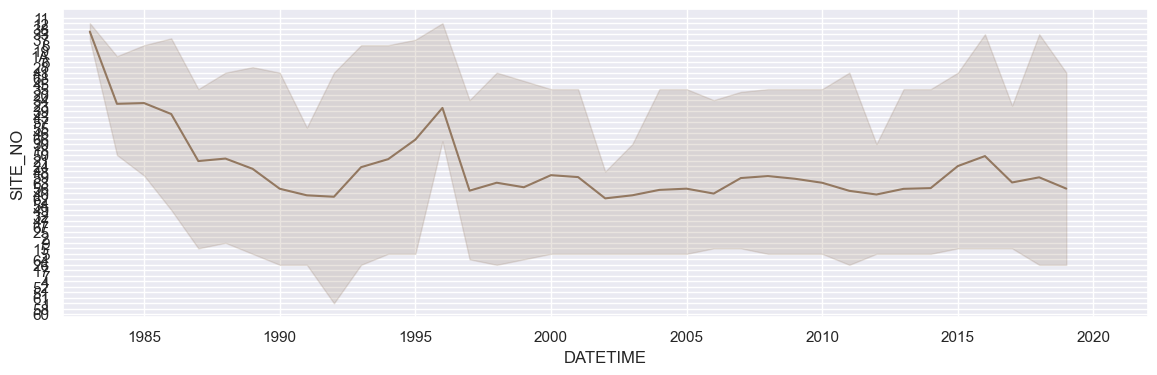


-------------------------------------------------------
NO_NETS
CATEGORICAL


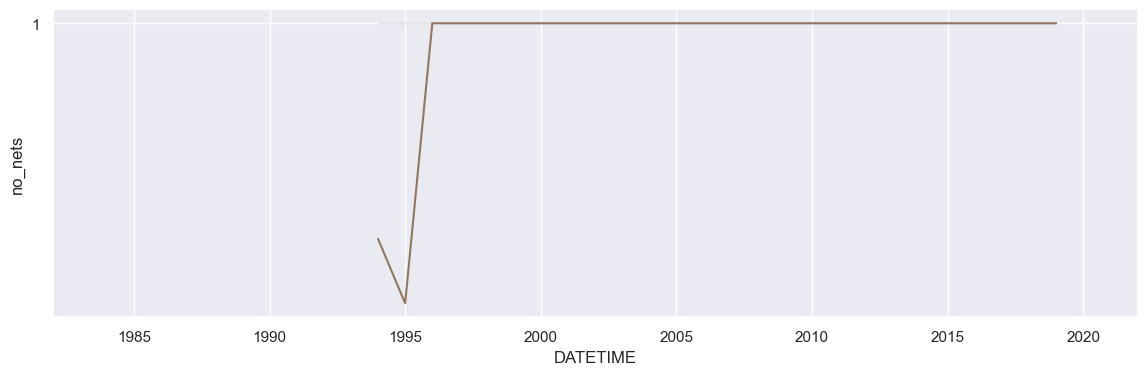


-------------------------------------------------------
CATCH_LBS
FLOAT


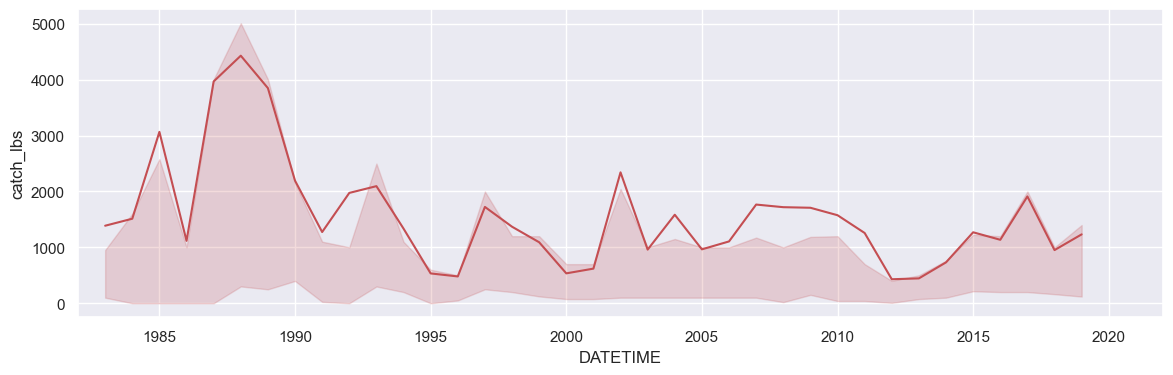


-------------------------------------------------------
CATCH_KG
FLOAT


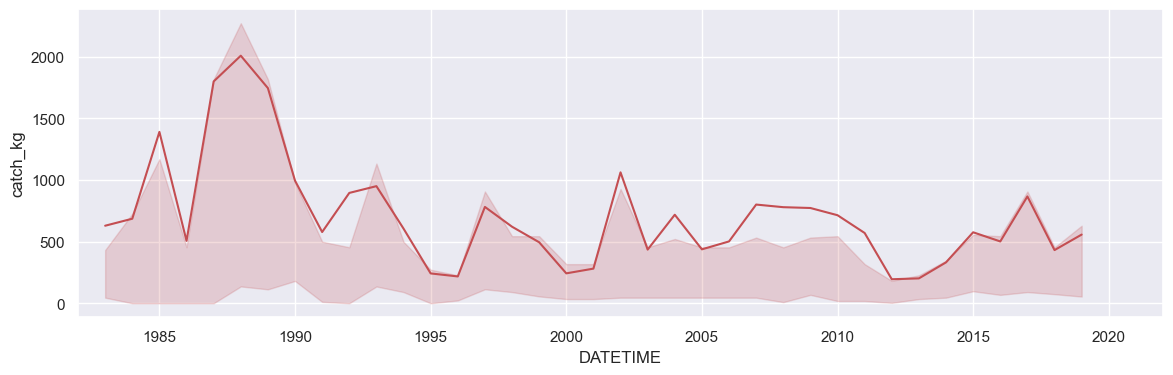


-------------------------------------------------------
ZONE
CATEGORICAL


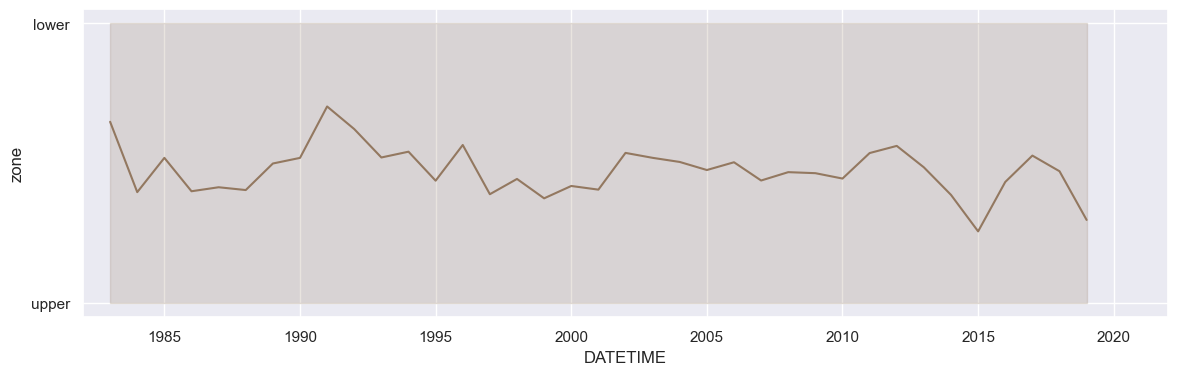


-------------------------------------------------------
LAST_NAME
CATEGORICAL


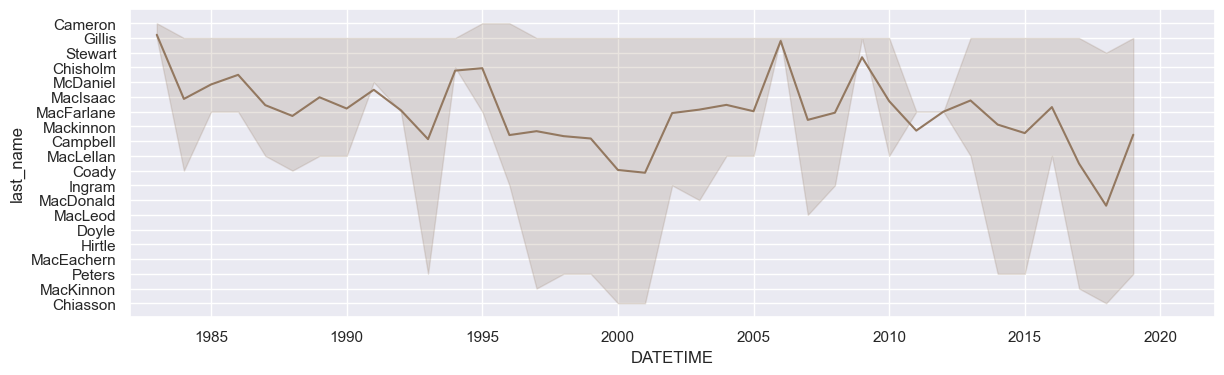


-------------------------------------------------------
HOURS_FISHED
FLOAT


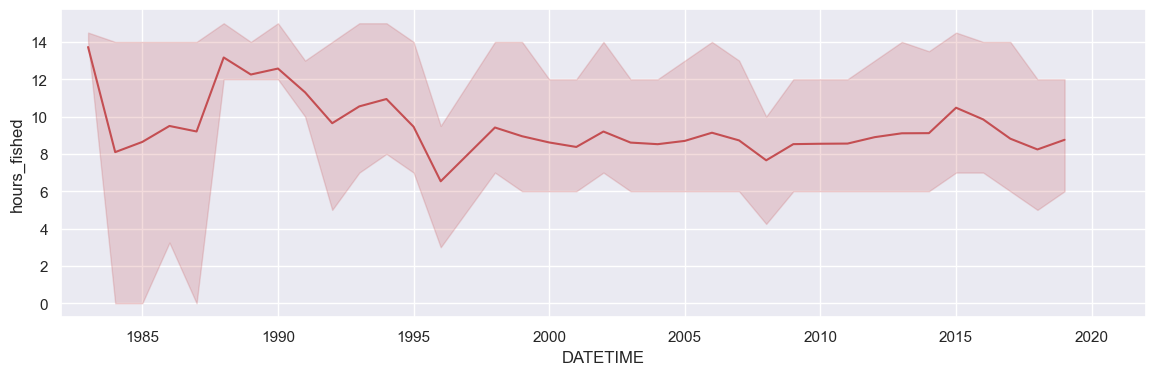


-------------------------------------------------------
SITE1
CATEGORICAL


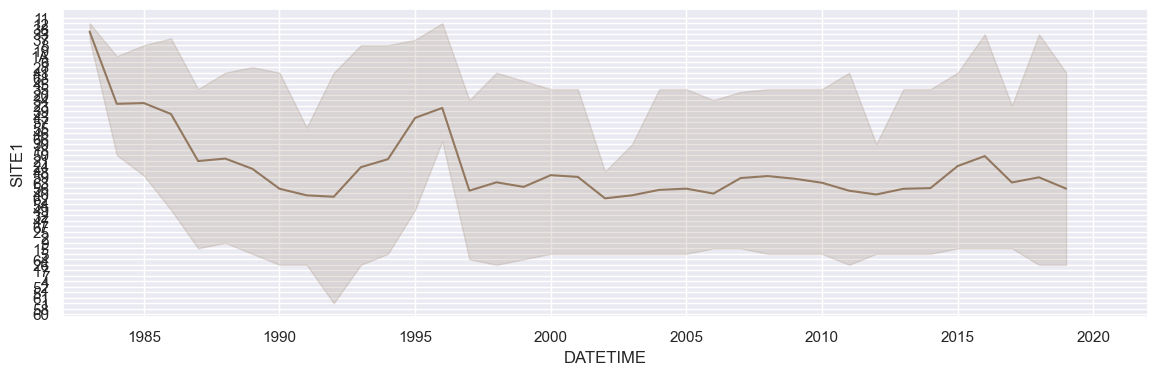


-------------------------------------------------------
SITE2
CATEGORICAL


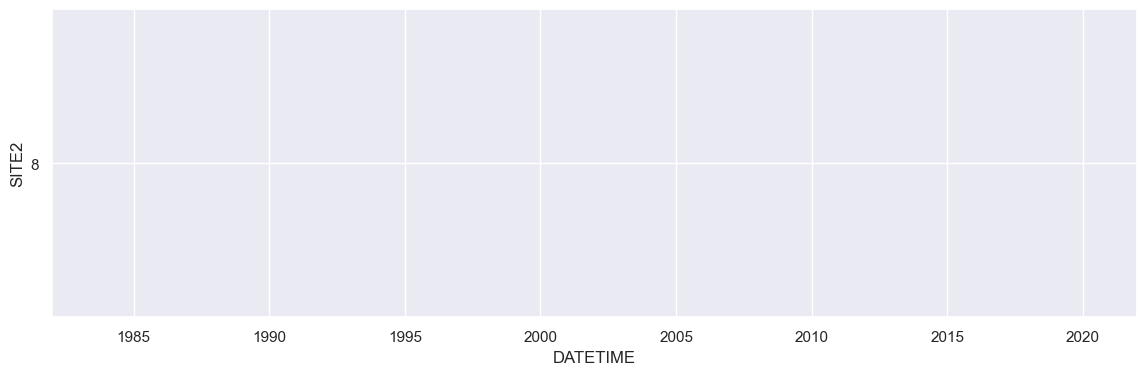

In [31]:
columns_with_no_data = ['DIST', 'RIVER', 'code', 'GEAR', ]
columns_to_print = [
    'SITE_NO', 'no_nets', 'YEAR', 'MM', 'DD', 'Week', 'catch_lbs', 'catch_kg', 
    'hours_fished', 'zone', 'last_name', 'SITE1', 'SITE2'
]

features = {
    'SITE_NO': 'categorical',
    'no_nets': 'categorical',  
    'catch_lbs': 'float', 
    'catch_kg': 'float', 
    'zone': 'categorical',
    'last_name': 'categorical',
    'hours_fished': 'float',  # update this field in temp dataframe
    'SITE1': 'categorical',
    'SITE2': 'categorical'
}

df = df_SD.copy()
df.loc[df['hours_fished'] == 'maximum ', 'hours_fished'] = '24'
df['hours_fished'] = df['hours_fished'].astype(float)

for feature in features:
    
    print('\n-------------------------------------------------------\n', feature.upper(), sep='')
    plt.figure(figsize=(14, 4))
    
    if features[feature] == 'float':
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature], errorbar=('pi', 50), color=sns.color_palette()[3])
        print('FLOAT')
    elif features[feature] == 'integer':  # convert to float or get a ValueError
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature].astype(float), errorbar=('pi', 50), color=sns.color_palette()[4])
        print('INT')
    elif features[feature] == 'categorical':
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature], errorbar=('pi', 50), color=sns.color_palette()[5])
        print('CATEGORICAL')    
    
    # show entire dataset time period for all plots
    plot.set_xlim(1982, 2022)
    
    plt.show()